# **Importing Libraries**

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time

# **Data Loading**

In [37]:
andal = pd.read_csv('/content/world_population.csv')
andal

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


# **Data Cleaning**

In [39]:
andal_cleaned = pd.melt(andal, id_vars=['Rank','CCA3','Country/Territory','Capital','Continent','Area (km²)',
                               'Density (per km²)','Growth Rate','World Population Percentage'],

                  var_name='Year',

                  value_name='Total_Population')
andal_cleaned

,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Population
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022 Population,41128771
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022 Population,2842321
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022 Population,44903225
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022 Population,44273
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022 Population,79824
...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970 Population,9377
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970 Population,76371
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970 Population,6843607
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970 Population,4281671


In [40]:
andal_cleaned['Year'] = andal_cleaned['Year'].str.replace('Population','', regex=False)
andal_cleaned

,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Population
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022,41128771
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022,2842321
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022,44903225
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022,44273
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022,79824
...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970,9377
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970,76371
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970,6843607
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970,4281671


In [41]:
andal_cleaned.describe()

,Rank,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total_Population
count,1872.000000,1.872000e+03,1872.000000,1872.000000,1872.000000,1.872000e+03
mean,117.500000,5.814494e+05,452.127044,1.009577,0.427051,2.661274e+07
std,67.567414,1.758542e+06,2062.253276,0.013360,1.711766,1.133600e+08
min,1.000000,1.000000e+00,0.026100,0.912000,0.000000,5.100000e+02
25%,59.000000,2.586000e+03,38.112000,1.001700,0.010000,3.180410e+05
50%,117.500000,8.119950e+04,95.346750,1.007900,0.070000,4.225097e+06
75%,176.000000,4.383170e+05,239.582100,1.017100,0.280000,1.546753e+07
max,234.000000,1.709824e+07,23172.266700,1.069100,17.880000,1.425887e+09


**Remove Null Values**

In [45]:
andal_cleaned = andal_cleaned.dropna()
andal_cleaned

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage', 'Year', 'Total_Population', 'Years',
       'Total_Populations', 'Density'],
      dtype='object')


,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Population,Years,Total_Populations,Density
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022,41128771,2022-01-01,41128771,63.0587
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022,2842321,2022-01-01,2842321,98.8702
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022,44903225,2022-01-01,44903225,18.8531
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022,44273,2022-01-01,44273,222.4774
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022,79824,2022-01-01,79824,170.5641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970,9377,1970-01-01,9377,81.4930
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970,76371,1970-01-01,76371,2.1654
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970,6843607,1970-01-01,6843607,63.8232
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970,4281671,1970-01-01,4281671,26.5976


# **Date Extraction**

In [47]:
andal_cleaned['Years'] = pd.to_datetime(andal_cleaned['Year'], errors='coerce')
andal_cleaned['Total_Populations'] = pd.to_numeric(andal_cleaned['Total_Population'], errors='coerce')
andal_cleaned['Density'] = pd.to_numeric(andal_cleaned['Density (per km²)'], errors='coerce')
andal_cleaned['Area'] = pd.to_numeric(andal_cleaned['Area (km²)'], errors='coerce')

andal_cleaned

<ipython-input-47-05e9b76794b1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  andal_cleaned['Years'] = pd.to_datetime(andal_cleaned['Year'], errors='coerce')


,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Population,Years,Total_Populations,Density,Area
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022,41128771,2022-01-01,41128771,63.0587,652230
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022,2842321,2022-01-01,2842321,98.8702,28748
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022,44903225,2022-01-01,44903225,18.8531,2381741
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022,44273,2022-01-01,44273,222.4774,199
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022,79824,2022-01-01,79824,170.5641,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970,9377,1970-01-01,9377,81.4930,142
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970,76371,1970-01-01,76371,2.1654,266000
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970,6843607,1970-01-01,6843607,63.8232,527968
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970,4281671,1970-01-01,4281671,26.5976,752612


In [48]:
andal_cleaned['Years'] = andal_cleaned['Years'].apply(lambda x: x.year)
andal_cleaned

,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Population,Years,Total_Populations,Density,Area
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022,41128771,2022,41128771,63.0587,652230
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022,2842321,2022,2842321,98.8702,28748
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022,44903225,2022,44903225,18.8531,2381741
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022,44273,2022,44273,222.4774,199
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022,79824,2022,79824,170.5641,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970,9377,1970,9377,81.4930,142
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970,76371,1970,76371,2.1654,266000
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970,6843607,1970,6843607,63.8232,527968
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970,4281671,1970,4281671,26.5976,752612


In [49]:
andal_cleaned = andal_cleaned.loc[:, ['Rank',	'CCA3',	'Country/Territory',	'Capital',	'Continent', 'Area', 'Density',	'Years','Total_Populations']]
andal_cleaned.sort_values(by=['Years'], inplace=True, ascending=True)
andal_cleaned.reset_index(inplace=True, drop=True)
andal_cleaned

,Rank,CCA3,Country/Territory,Capital,Continent,Area,Density,Years,Total_Populations
0,74,ZWE,Zimbabwe,Harare,Africa,390757,41.7665,1970,5202918
1,207,GGY,Guernsey,Saint Peter Port,Europe,78,811.5513,1970,52656
2,68,GTM,Guatemala,Guatemala City,North America,108889,163.8725,1970,5453208
3,191,GUM,Guam,Hagåtña,Oceania,549,312.8852,1970,88300
4,178,GLP,Guadeloupe,Basse-Terre,North America,1628,243.0909,1970,318310
...,...,...,...,...,...,...,...,...,...
1867,232,NIU,Niue,Alofi,Oceania,260,7.4385,2022,1934
1868,6,NGA,Nigeria,Abuja,Africa,923768,236.5759,2022,218541212
1869,54,NER,Niger,Niamey,Africa,1267000,20.6851,2022,26207977
1870,93,PNG,Papua New Guinea,Port Moresby,Oceania,462840,21.9139,2022,10142619


In [50]:
from scipy import stats
stat, p = stats.normaltest(andal_cleaned.Total_Populations)

print ('Statistics = %.3f , p = %.3f' %(stat, p))
alpha = 0.05

if p > alpha:
  print('Data looks Gaussian')
else:
  print('Data does not Look Gaussian')

Statistics = 2907.349 , p = 0.000
Data does not Look Gaussian


# **Kurtosis and Skewness**

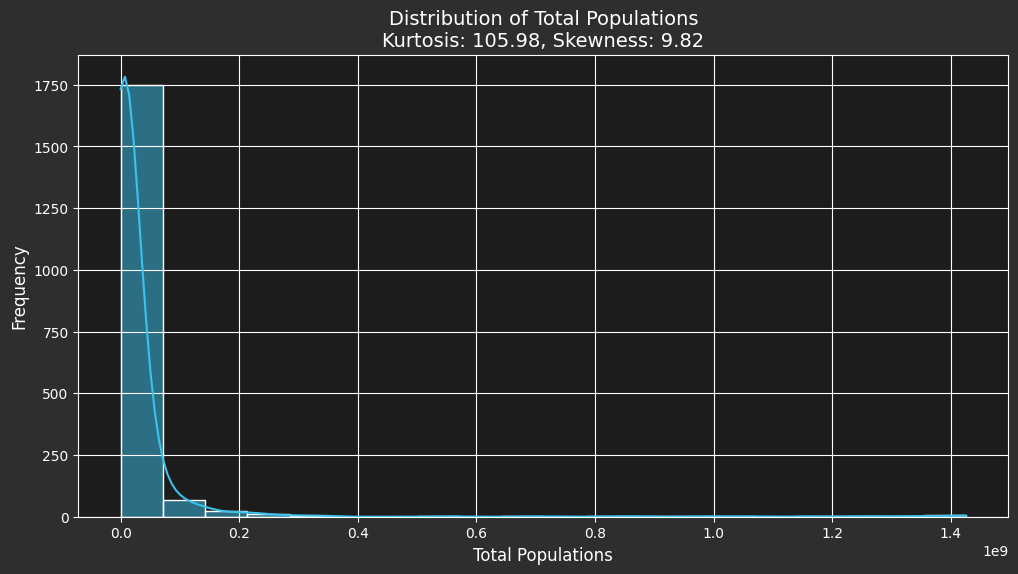

In [51]:
kurtosis = stats.kurtosis(andal_cleaned['Total_Populations'])
skewness = stats.skew(andal_cleaned['Total_Populations'])

plt.figure(figsize=(12, 6))

sns.histplot(andal_cleaned['Total_Populations'], bins=20, kde=True, color="#3DC2EC")

plt.title(f"Distribution of Total Populations\nKurtosis: {kurtosis:.2f}, Skewness: {skewness:.2f}", fontsize=14, color='white')
plt.xlabel('Total Populations', fontsize=12, color='white')
plt.ylabel('Frequency', fontsize=12, color='white')

plt.grid(True)
plt.gca().set_facecolor('#1C1C1C')
plt.gcf().set_facecolor('#2E2E2E')

plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.show()


# **Box Plot**

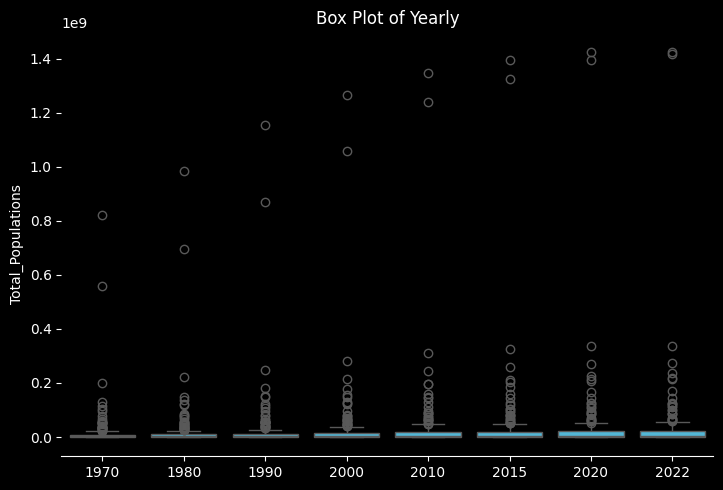

In [52]:
plt.style.use('dark_background')
box_color = '#3dc2ec'
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x='Years', y='Total_Populations', data=andal_cleaned, color=box_color)
plt.xlabel('')
plt.title('Box Plot of Yearly')
sns.despine(left=True)
plt.tight_layout()
plt.show()

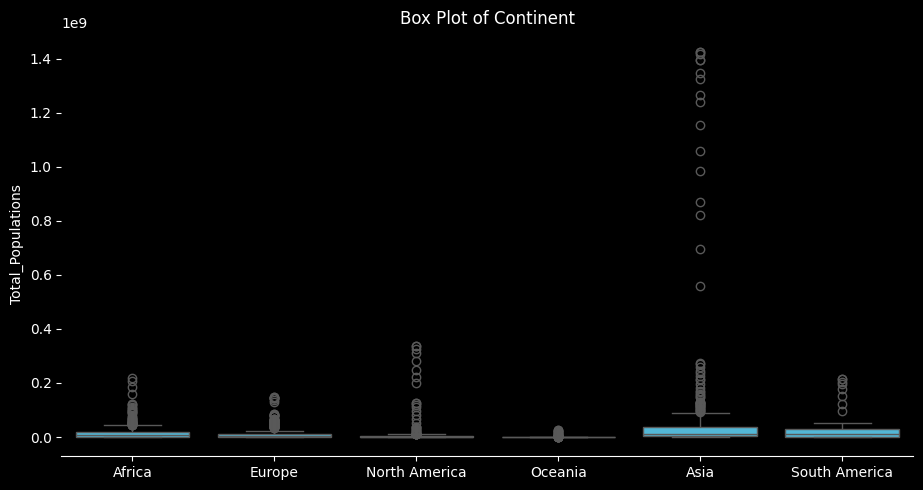

In [53]:
plt.style.use('dark_background')
box_color = '#3dc2ec'
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x='Continent', y='Total_Populations', data=andal_cleaned, color=box_color)
plt.xlabel('')
plt.title('Box Plot of Continent')
sns.despine(left=True)
plt.tight_layout()
plt.show()

# **Normal Distribution**

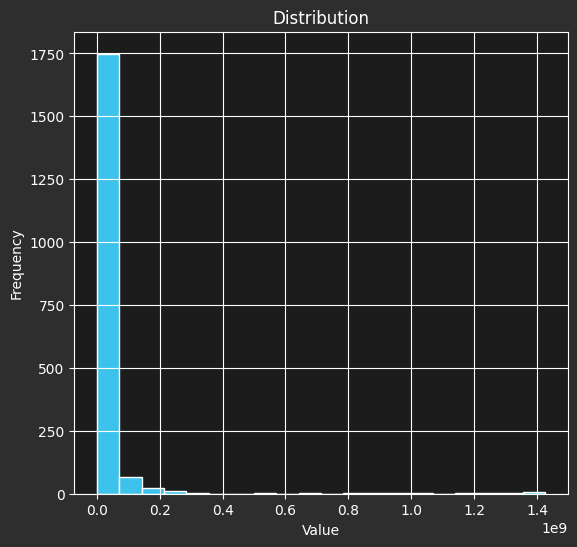

In [54]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

plt.gca().set_facecolor('#1C1C1C')
andal_cleaned['Total_Populations'].hist(bins=20, color='#3DC2EC', edgecolor='white')
plt.title('Distribution', color='white')
plt.xlabel('Value', color='white')
plt.ylabel('Frequency', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.gcf().set_facecolor('#2E2E2E')

plt.show()


# **Visualization**

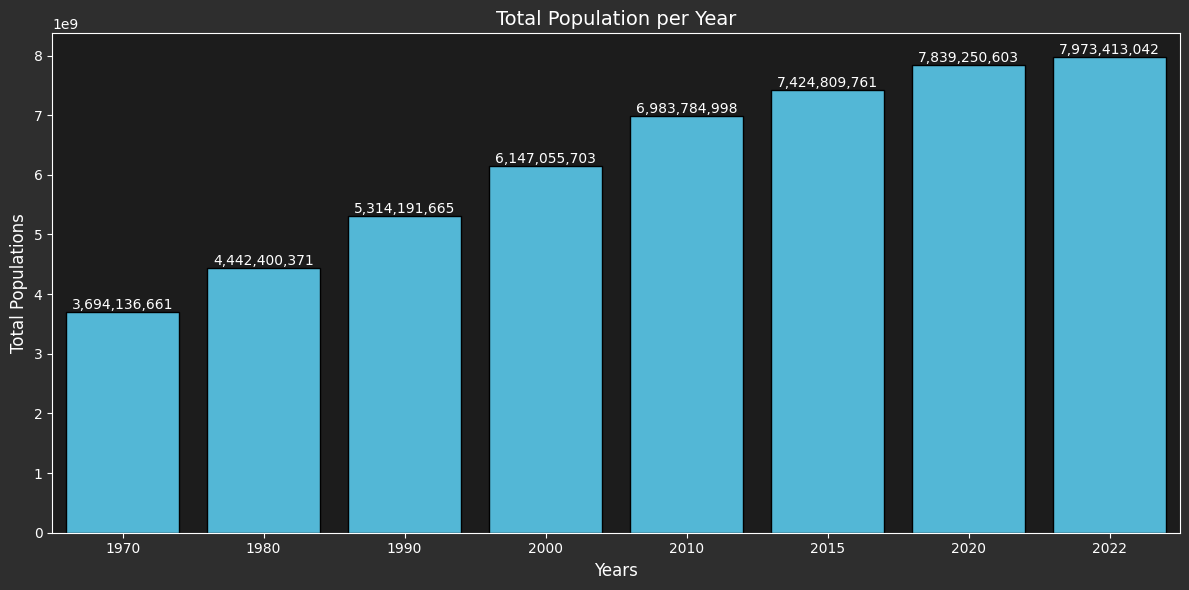

In [68]:
yearly_population = andal_cleaned.groupby('Years')['Total_Populations'].sum()

plt.figure(figsize=(12, 6))

sns.barplot(x=yearly_population.index, y=yearly_population.values, color='#3DC2EC', edgecolor='black')

plt.title('Total Population per Year', fontsize=14, color='white')
plt.xlabel('Years', fontsize=12, color='white')
plt.ylabel('Total Populations', fontsize=12, color='white')

plt.gca().set_facecolor('#1C1C1C')
plt.gcf().set_facecolor('#2E2E2E')

plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

for index, value in enumerate(yearly_population.values):
    plt.text(index, value, f'{value:,}', color='white', ha='center', va='bottom')


plt.tight_layout()
plt.show()



**Analysis:**

This bar graph depicts the world population per year, from 1970 until 2022, reaching almost 7.97 billion in 2022 from 3.69 billion in 1970. It was a growth significantly influenced by increased life expectancy and declining mortality rates, with further rises in population within both Asia and Africa. These two regions now host the majority of people in the world. While the overall growth rate remains high, a significant deceleration is showing up: the increase from 2015 to 2022 is lower compared with the previous years. Such trends are proof of the improvement in healthcare, nutrition, and living standards in general; thus, improvement in the expectancy of life and mortality rates can be seen as positive changes. These changes in demographics have an implication for resources, urban planning, and global policies, which are increasingly realized in the worldwide struggles with these changes. Understanding these trends is of prime importance to handling challenges such as sustainable development and population management for future years ahead, since demography alone keeps changing social dynamics and economic structures worldwide.

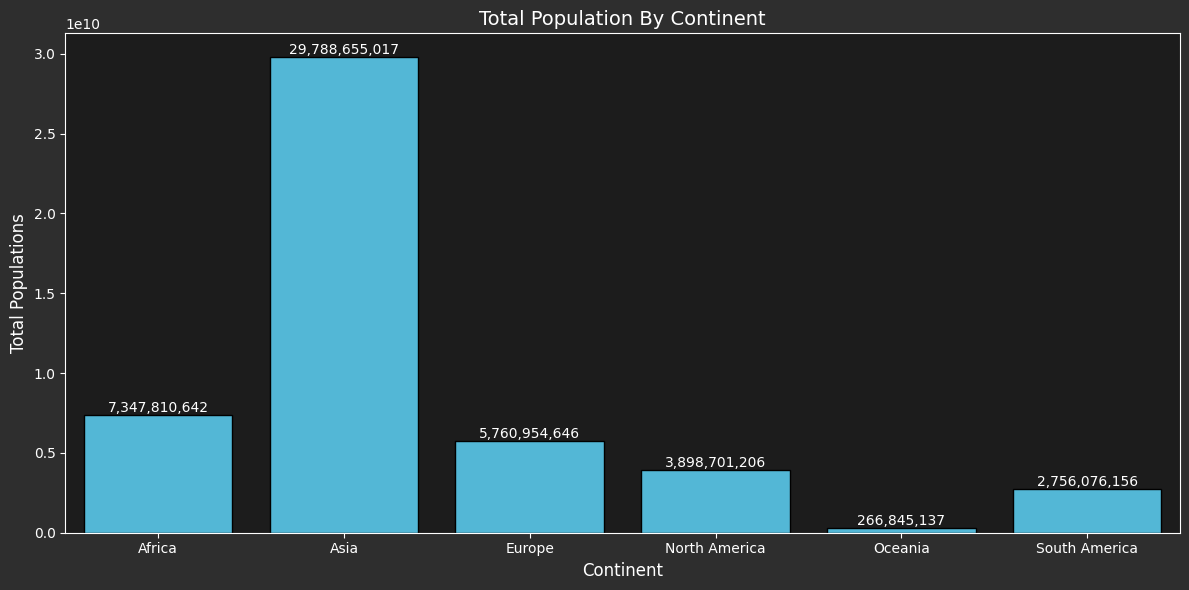

In [67]:
continent_population = andal_cleaned.groupby('Continent')['Total_Populations'].sum()

plt.figure(figsize=(12, 6))

sns.barplot(x=continent_population.index, y=continent_population.values, color='#3DC2EC', edgecolor='black')

plt.title('Total Population By Continent', fontsize=14, color='white')
plt.xlabel('Continent', fontsize=12, color='white')
plt.ylabel('Total Populations', fontsize=12, color='white')

plt.gca().set_facecolor('#1C1C1C')
plt.gcf().set_facecolor('#2E2E2E')

plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
for index, value in enumerate(continent_population.values):
    plt.text(index, value, f'{value:,}', color='white', ha='center', va='bottom')


plt.tight_layout()
plt.show()


**Analysis:**

The chart shows the population distribution by continents around the world. Apparently, more than half of the world's population belongs to the Asian continent, amounting to approximately 29 billion citizens. The second most inhabited continent is Africa, which, in many countries, has one of the fastest-growing populations. Europe has an almost stable population, while North America's population rate has been at a state of moderation. Oceania is the least populated among the various continents, having an estimated 266 million citizens. This reflects the future trend of Asia and Africa continuing to dominate population increases globally. The population in various countries, mostly African, is expected to double in the near future, making them account for a higher percentage of the global population. The increasing population of the world would, therefore, rely on the demography of Asia and Africa: the former on account of numbers, the latter for continued growth. A dependence that is a surety towards understanding the socio-economic implications of such population trends deserves more emphasis in shaping global development and policymaking.

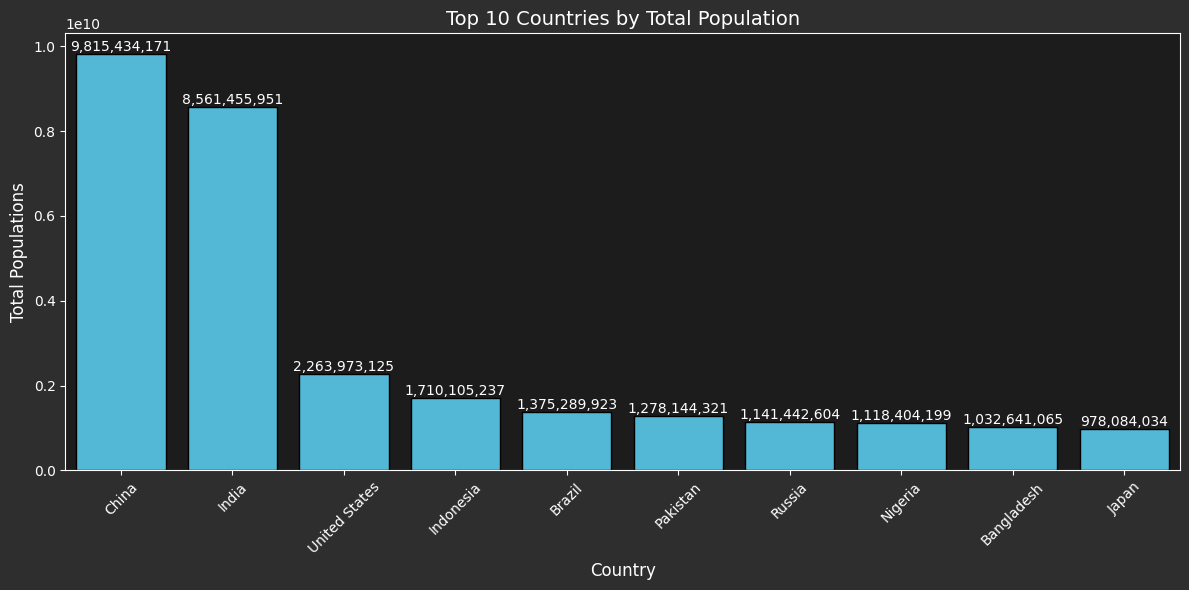

In [66]:
country_population = andal_cleaned.groupby('Country/Territory')['Total_Populations'].sum().nlargest(10)

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x=country_population.index, y=country_population.values, color='#3DC2EC', edgecolor='black')

plt.title('Top 10 Countries by Total Population', fontsize=14, color='white')
plt.xlabel('Country', fontsize=12, color='white')
plt.ylabel('Total Populations', fontsize=12, color='white')

plt.gca().set_facecolor('#1C1C1C')
plt.gcf().set_facecolor('#2E2E2E')

plt.tick_params(axis='x', colors='white', rotation=45)
plt.tick_params(axis='y', colors='white')

for index, value in enumerate(country_population.values):
    plt.text(index, value, f'{value:,}', color='white', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Analysis:**

The top 10 countries by total world population includes China, with approximately 9.81 billion people while the one with the least among the others is Japan with 978 million. Other countries such as Indonesia and Brazil are well on their way upward within the population growth scale due to their youthful population and large birth rates. India, today, is the second most populous country in the world and the second in Asia, with a population of about 8.56 billion. Besides demographic change, together with the fluctuating populations of China and India, it reflects changing global dynamics. These projections have shown that countries ranked according to population will change, with high growth rates observed in other countries. The analysis puts empirical evidence together with demographic trends to shed light on what the population distribution may look like in the future and what its repercussions will be on society worldwide.

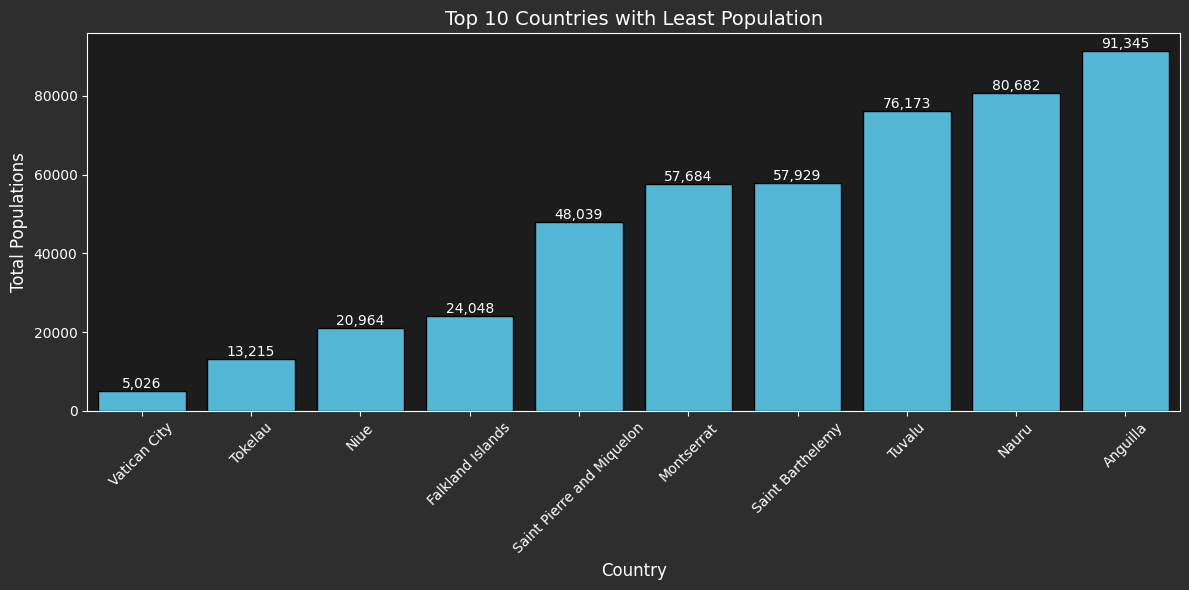

In [70]:
country_population = andal_cleaned.groupby('Country/Territory')['Total_Populations'].sum().nsmallest(10)

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x=country_population.index, y=country_population.values, color='#3DC2EC', edgecolor='black')

plt.title('Top 10 Countries with Least Population', fontsize=14, color='white')
plt.xlabel('Country', fontsize=12, color='white')
plt.ylabel('Total Populations', fontsize=12, color='white')

plt.gca().set_facecolor('#1C1C1C')
plt.gcf().set_facecolor('#2E2E2E')

plt.tick_params(axis='x', colors='white', rotation=45)
plt.tick_params(axis='y', colors='white')

for index, value in enumerate(country_population.values):
    plt.text(index, value, f'{value:,}', color='white', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Analysis:**

This bar chart shows the top 10 least populated countries, which will somehow determine what those countries are in the progressing population. Evidence shows that most of them are countries located near waters or with limited resources, probably experiencing burdens due to their highly remote location and dependence on other people's help. Based on the data above, among these, Anguilla has the highest population; there are around 91,000 people in that country. Vatican City is the smallest, with a population of about 5,000 citizens, since it is quite essentially a center of religion and administration. In analyzing these countries, we think of categories such as small island nations that point out their distinctive features. Their small population results partly from limited land area added to geographic isolation and specialized economies. Dependence on tourism, little industries of specialization, and poor natural resources are specific factors that determine the population, hence determining the demography of these regions.

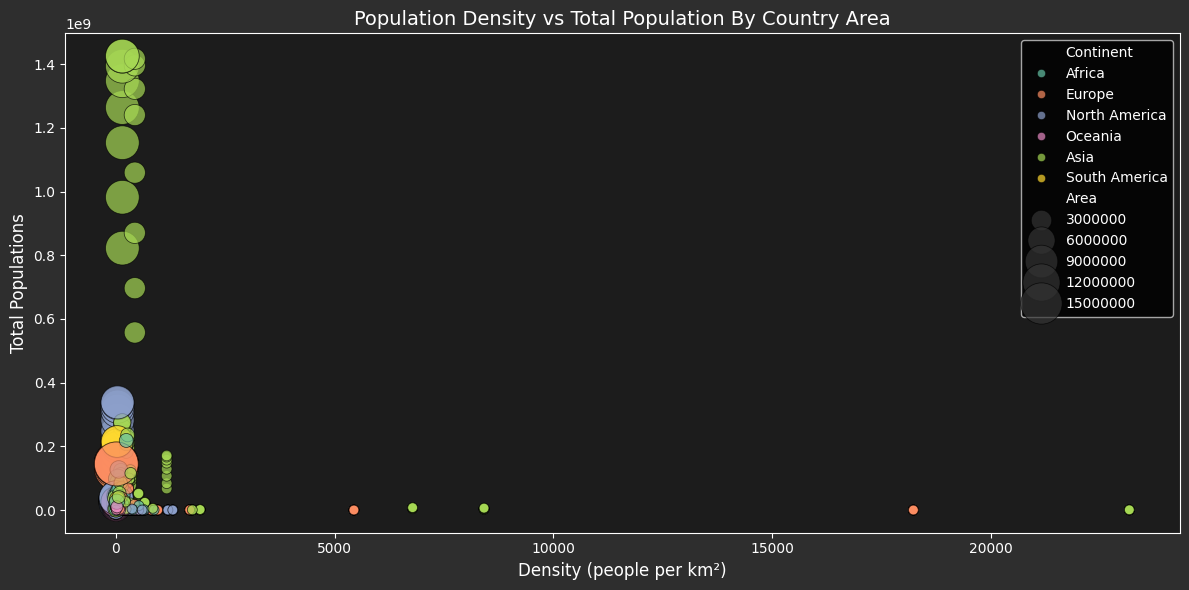

In [64]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    x='Density',
    y='Total_Populations',
    size='Area',
    sizes=(50, 1000),
    hue='Continent',
    palette='Set2',
    data=andal_cleaned,
    edgecolor='black',
    alpha=0.7
)
plt.title('Population Density vs Total Population By Country Area', fontsize=14, color='white')
plt.xlabel('Density (people per km²)', fontsize=12, color='white')
plt.ylabel('Total Populations', fontsize=12, color='white')
plt.gca().set_facecolor('#1C1C1C')
plt.gcf().set_facecolor('#2E2E2E')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()


**Analysis**

This scatter plot shows the population density plotted against the total population across various countries, with data grouped by the respective continents. Interestingly enough, the small countries have a high population density with fairly low total populations. On the other hand, the populous countries have a huge variation in terms of density for large populations. From this, it can be interpreted that in reality, population densities from Africa and South America are relatively low due to their highly expansive land areas with smaller population sizes. This scatterplot shows that high population density does not mean a high total population. Such trends are important to understand in the light of development since countries are experiencing continuous population growth. Hence, Asia stands out, having both the highest population density and a relatively high total population judging by the land area. This information has significant implications for density in future development strategies, ensuring that countries are able to care for their people and maintain their living conditions in a sustainable manner.